In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
import tensorflow as tf

The dataset- Ford A. The data comes from the UCR archive. It contains 3601 training instances and 1320 testing instances. Each  timeseries corresponds to a measurement of engine noise captured by a motor sensor. For this task - the goal is to automatically detect the presence of a specific issue with the engine - problem is a binary classification task

In [4]:
root_url = "https://raw.githubusercontent.com/hfawaz/cd-diagram/master/FordA/"

train_df = pd.read_csv(f"{root_url}FordA_TRAIN.tsv", sep='\t', header=None)
test_df = pd.read_csv(f"{root_url}FordA_TEST.tsv", sep='\t', header=None)

In [5]:
train_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,-1,-0.797172,-0.664392,-0.373015,0.040815,0.526936,0.984288,1.353120,1.578108,1.659251,...,1.120756,0.722417,0.362068,0.092083,-0.081268,-0.212573,-0.391456,-0.664392,-1.073796,-1.564343
1,1,0.804855,0.634629,0.373474,0.038343,-0.340988,-0.740860,-1.109667,-1.395357,-1.570192,...,0.386403,0.049213,-0.258138,-0.510583,-0.683647,-0.773817,-0.785255,-0.714885,-0.560443,-0.319086
2,-1,0.727985,0.111284,-0.499124,-1.068629,-1.578351,-1.990534,-2.302031,-2.503403,-2.585211,...,0.394463,0.463685,0.507735,0.517174,0.504588,0.476270,0.438513,0.394463,0.339400,0.255391
3,-1,-0.234439,-0.502157,-0.732488,-0.946128,-1.139739,-1.323336,-1.490243,-1.607077,-1.620430,...,-0.952804,-0.929437,-0.922761,-0.929437,-0.909409,-0.835970,-0.695768,-0.478790,-0.188707,0.119736
4,-1,-0.171328,-0.062285,0.235829,0.710396,1.239969,1.649823,1.876321,1.865535,1.703751,...,0.776188,0.725496,0.697453,0.731967,0.808545,0.839823,0.733046,0.437520,-0.026585,-0.602213


In [6]:
train_df.shape

(3601, 501)

In [8]:
test_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,-1,-0.140402,0.171641,0.302044,0.232804,0.033853,-0.224183,-0.469987,-0.645396,-0.617700,...,-0.319966,0.390903,0.974831,1.258717,1.143316,0.647092,-0.049582,-0.690402,-0.976596,-0.794263
1,-1,0.334038,0.322253,0.453844,0.671852,0.887897,1.020469,1.059750,1.030290,0.950746,...,0.435186,-0.346502,-0.924912,-1.208716,-1.247996,-1.139974,-1.041772,-1.041772,-1.159614,-1.375659
2,-1,0.716686,0.744367,0.725913,0.661325,0.555217,0.413585,0.246580,0.065273,-0.121109,...,3.171020,2.276019,1.219548,0.081881,-1.050250,-2.092881,-2.983269,-3.675281,-4.136622,-4.339612
3,1,1.240282,1.331189,1.386596,1.383220,1.305979,1.142784,0.878613,0.532291,0.140025,...,-0.820262,-1.124551,-1.302012,-1.340564,-1.271440,-1.146352,-1.011328,-0.931222,-0.934498,-1.001288
4,-1,-1.159478,-1.204174,-1.167605,-1.033518,-0.818166,-0.558119,-0.299291,-0.093691,0.022770,...,0.660853,0.441438,0.206176,-0.006941,-0.146919,-0.183082,-0.112382,0.008987,0.131413,0.186266


In [9]:
test_df.shape

(1320, 501)

In [10]:
train_df.iloc[:,0].value_counts()

0
-1    1846
 1    1755
Name: count, dtype: int64

The first col is the label in this dataset:

In [11]:
x_train, y_train = train_df.iloc[:,1:], train_df.iloc[:,0]
x_test, y_test = test_df.iloc[:,1:], test_df.iloc[:, 0]

**Visualize the data:**

In [21]:
classes = np.unique(np.concatenate((y_train.values, y_test.values), axis=0))

In [22]:
classes

array([-1,  1], dtype=int64)

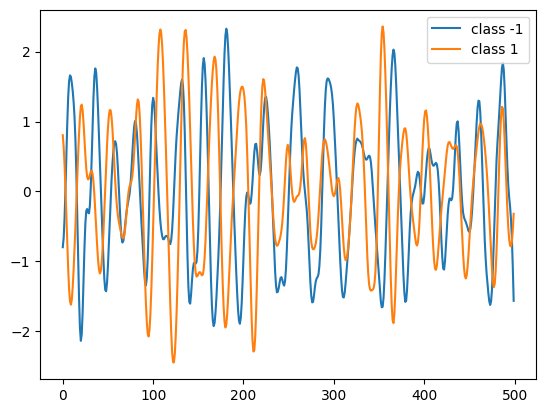

In [26]:
plt.figure()
for c in classes:
    c_x_train = x_train[y_train == c]
    plt.plot(c_x_train.values[0], label="class "+str(c))
plt.legend(loc="best")
plt.show()

**Standardize the data:**
- our time series is already a single length (500) => their values however are in various ranges which isn't ideal for a neural net. We should seek to make input values normalized/

In [28]:
x_train,y_train = x_train.values, y_train.values
x_test, y_test = x_test.values, y_test.values

In [30]:
x_train.shape, x_test.shape

((3601, 500), (1320, 500))

In [33]:
x_train.shape

(3601, 500)

In [35]:
np.expand_dims(x_train, axis=-1).shape

(3601, 500, 1)

In [36]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [37]:
y_train

array([-1,  1, -1, ..., -1,  1, -1], dtype=int64)

In [39]:
num_classes = len(np.unique(y_train))

In [40]:
num_classes

2

In [41]:
# shuffle the training set:
idx = np.random.permutation(len(x_train))
x_train = x_train[idx]
y_train = y_train[idx]

In [42]:
# standardize the labels to positive integers - expected labels will be 0 and 1
y_train[y_train == -1] = 0
y_test[y_test == -1] = 0

Building a model:
- Build a Fully convolutional neural network

In [44]:
def make_model(input_shape=[500,1]):
    input_layer = tf.keras.layers.Input(input_shape)

    conv1 = tf.keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = tf.keras.layers.BatchNormalization()(conv1)
    conv1 = tf.keras.layers.ReLU()(conv1)

    conv2 = tf.keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = tf.keras.layers.BatchNormalization()(conv2)
    conv2 = tf.keras.layers.ReLU()(conv2)

    conv3 = tf.keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = tf.keras.layers.BatchNormalization()(conv3)
    conv3 = tf.keras.layers.ReLU()(conv3)

    gap = tf.keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = tf.keras.layers.Dense(1, activation="sigmoid")(gap)

    return tf.keras.Model(inputs=[input_layer], outputs=[output_layer])

In [45]:
model = make_model()

In [46]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 500, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 500, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 500, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 500, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 500, 64)        │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 500, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 500, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 500, 64)        │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 500, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 500, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,793 (100.75 KB)

 Trainable params: 25,409 (99.25 KB)

 Non-trainable params: 384 (1.50 KB)

Train the model:

In [51]:
epochs = 500
batch_size = 32

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        "../data/best_model.keras", save_best_only=True, monitor="val_loss"
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss", patience=50, restore_best_weights=True, verbose=1
    )
]

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=[
        tf.keras.metrics.Accuracy(),
        tf.keras.metrics.Precision(),
        tf.keras.metrics.Recall()
    ]
)

In [52]:
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1
)

Epoch 1/500
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.0000e+00 - loss: 0.6769 - precision: 0.5804 - recall: 0.9518 - val_accuracy: 0.0000e+00 - val_loss: 0.7041 - val_precision: 0.4840 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 2/500
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.0000e+00 - loss: 0.5124 - precision: 0.7045 - recall: 0.8026 - val_accuracy: 0.0000e+00 - val_loss: 0.7377 - val_precision: 0.4840 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 3/500
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.0000e+00 - loss: 0.4662 - precision: 0.7674 - recall: 0.7848 - val_accuracy: 0.0000e+00 - val_loss: 0.7815 - val_precision: 0.4840 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 4/500
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.0000e+00 - loss: 0.4322 - precision: 0.7730 - recall: 0.8250 - val_accuracy: 0.0000e+00 - val_loss: 0.7966 - val_precision: 0.4847 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 5/500
90/90 ━━━━━━━━━━━━━━

In [53]:
model.evaluate(x_test,y_test)

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0920 - precision: 0.9684 - recall: 0.9656


[0.09523408114910126, 0.0, 0.9700787663459778, 0.964006245136261]

In [55]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'precision', 'recall', 'val_accuracy', 'val_loss', 'val_precision', 'val_recall', 'learning_rate'])

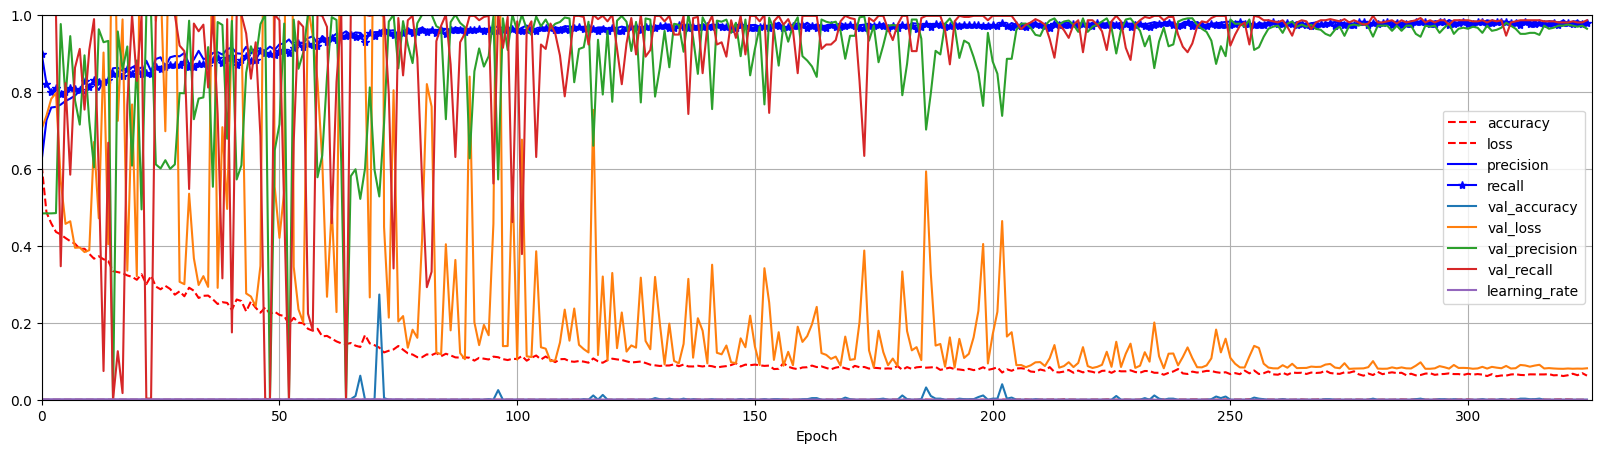

In [59]:
pd.DataFrame(history.history).plot(
    figsize=(20,5), xlim = [0, 326], ylim=[0,1], grid=True, xlabel="Epoch", 
    style = ["r--","r--","b-","b-*"]
)
plt.show()